In [383]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from astropy.modeling import models, fitting
import numpy.polynomial.polynomial as poly

In [2]:
param_hd97048 = ['scattering_angle', 'polarized_phase_function', 
         'error_polarized_phase_function', 'phase_function', 'error_phase_function']
hd97048 = pd.read_table('HD97048_phasefunction.dat', sep='\s+', header=None, comment='#', names=param_hd97048)

In [70]:
scattering_angle = pd.DataFrame(hd97048['scattering_angle']).values.ravel()
polarized_phase_function = pd.DataFrame(hd97048['polarized_phase_function']).values.ravel()
error_polarized_phase_function = pd.DataFrame(hd97048['error_polarized_phase_function']).values.ravel()
phase_function = pd.DataFrame(hd97048['phase_function']).values.ravel()
error_phase_function = pd.DataFrame(hd97048['error_phase_function']).values.ravel()

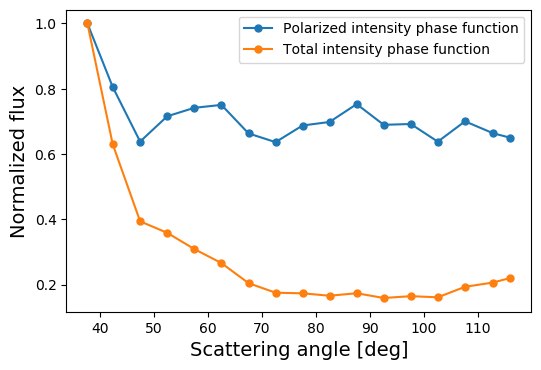

In [71]:
plt.figure(dpi=100)
plt.plot(scattering_angle, polarized_phase_function, '-o', ms=5, label='Polarized intensity phase function')
plt.plot(scattering_angle, phase_function, '-o', ms=5, label='Total intensity phase function')
plt.xlabel('Scattering angle [deg]', fontsize=14)
plt.ylabel('Normalized flux', fontsize=14)
plt.legend()

In [259]:
def hg(phi, g):
    p = (1 - g**2)/(1 + g**2 - 2*g*np.cos(phi))**(3/2)
    return p

def hg2(phi, g1, g2, w1, w2):
    g1=0.99
    g2=-0.14
    p2 = w1*hg(g1, phi) + w2*hg(g2, phi)
    return p2

def hg3(phi, g1, g2, g3, w1, w2, w3):
    p3 = w1*hg(g1, phi) + w2*hg(g2, phi) + w3*hg(g3, phi)
    return p3

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


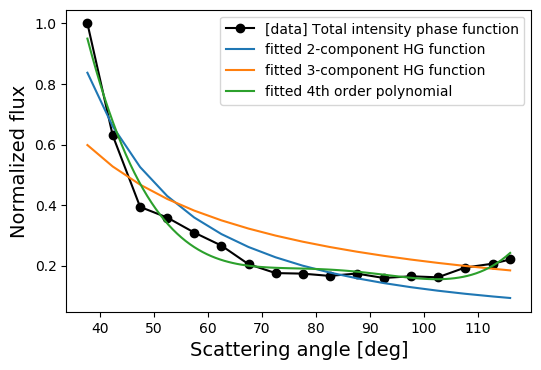

In [353]:
popt, pcov = curve_fit(hg, scattering_angle, phase_function)
popt2, pcov2 = curve_fit(hg2, scattering_angle, phase_function)
popt3, pcov3 = curve_fit(hg3, scattering_angle, phase_function)

coefs = poly.polyfit(scattering_angle, phase_function, 4)
x_new = np.linspace(scattering_angle[0], scattering_angle[-1], 100)
ffit = poly.polyval(x_new, coefs)

plt.figure(dpi=100)
plt.plot(scattering_angle, phase_function, '-ok',label='[data] Total intensity phase function')
#plt.plot(scattering_angle, hg(scattering_angle, *popt), label='fitted 1-component HG function')
plt.plot(scattering_angle, hg2(scattering_angle, *popt2), label='fitted 2-component HG function')
plt.plot(scattering_angle, hg3(scattering_angle, *popt3), label='fitted 3-component HG function')
plt.plot(x_new, ffit, label='fitted 4th order polynomial')
plt.xlabel('Scattering angle [deg]', fontsize=14)
plt.ylabel('Normalized flux', fontsize=14)
plt.legend()

In [236]:
param_bcca = ['scattering_angle_bcca', 'z_11', 'z_12', 'z_22', 'z_33', 'z_34', 'z_44']
param_bpca = ['scattering_angle_bpca', 'z_11', 'z_12', 'z_22', 'z_33', 'z_34', 'z_44']

bcca = pd.read_table('lmd1.6um_cc1024_TMM.dat', sep='\s+', header=None, comment='#', skiprows=6, names=param_bcca)
bpca = pd.read_table('lmd1.6um_pc1024_TMM.dat', sep='\s+', header=None, comment='#', skiprows=6, names=param_bpca)

#bcca

In [74]:
scattering_angle_bcca = pd.DataFrame(bcca['scattering_angle_bcca']).values.ravel()
z11_bcca = pd.DataFrame(bcca['z_11']).values.ravel()
z12_bcca = pd.DataFrame(bcca['z_12']).values.ravel()

scattering_angle_bpca = pd.DataFrame(bpca['scattering_angle_bpca']).values.ravel()
z11_bpca = pd.DataFrame(bpca['z_11']).values.ravel()
z12_bpca = pd.DataFrame(bpca['z_12']).values.ravel()

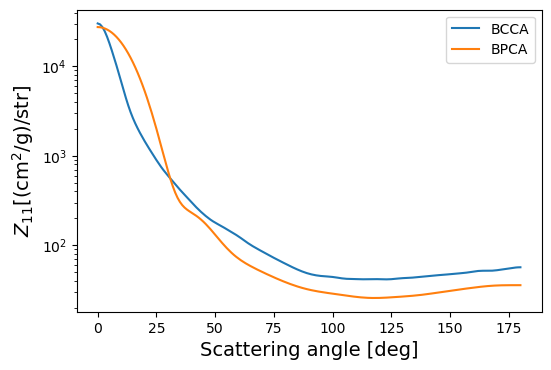

In [240]:
plt.figure(dpi=100)
plt.plot(scattering_angle_bcca, z11_bcca, '-', label='BCCA')
plt.plot(scattering_angle_bpca, z11_bpca, '-', label='BPCA')
plt.xlabel('Scattering angle [deg]', fontsize=14)
plt.ylabel(r'$Z_{11}$[(cm$^2$/g)/str]', fontsize=14)
plt.yscale('log')
plt.legend()

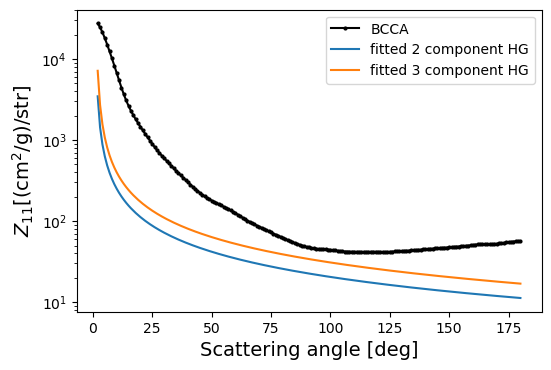

In [406]:
popt2, pcov2 = curve_fit(hg2, scattering_angle_bcca[2:], z11_bcca[2:],
                      bounds=((0.5, 0.25, -1000, -1000), (1.025, 0.75, 1000, 1000)))

popt3, pcov3 = curve_fit(hg3, scattering_angle_bcca[2:], z11_bcca[2:], 
                       bounds=((0.5, 0.25, 0, -1000, -1000, -1000), (1.025, 0.75, 0.5, 1000, 1000, 1000)))



plt.figure(dpi=100)
plt.plot(scattering_angle_bcca[2:], z11_bcca[2:], '-ok', ms=2, label='BCCA')
plt.plot(scattering_angle_bcca[2:], hg2(scattering_angle_bcca[2:], *popt2), '-', label='fitted 2 component HG')
plt.plot(scattering_angle_bcca[2:], hg3(scattering_angle_bcca[2:], *popt3), '-', label='fitted 3 component HG')
plt.xlabel('Scattering angle [deg]', fontsize=14)
plt.ylabel(r'$Z_{11}$[(cm$^2$/g)/str]', fontsize=14)
plt.yscale('log')
plt.legend()

[ 1.          0.91843535  0.83727868  0.75693801  0.67782132  0.60033659
  0.52489184  0.45189504  0.3817542   0.3148773   0.25167235  0.19254732
  0.13791022  0.08816905  0.04373178  0.00500642 -0.02759904 -0.05367661
 -0.0728183  -0.0846161  -0.08866204 -0.0845481  -0.07186631 -0.05020867
 -0.01916718  0.02166614  0.0726993   0.13434028  0.20699708  0.2910777
  0.38699011  0.49514233  0.61594234  0.74979813  0.8971177   1.05830904
  1.23378014  1.42393901  1.62919362  1.84995198  2.08662207  2.3396119
  2.60932945  2.89618271  3.20057969  3.52292837  3.86363675  4.22311282
  4.60176457  5.        ]


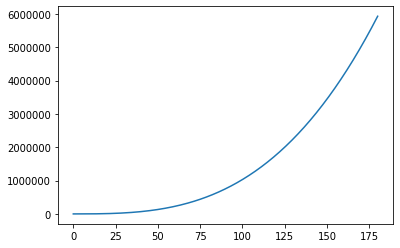

In [397]:
def func(x, a, c, d):
    return a*np.exp(-c*x)+d

def bell(x):
    b1 = x
    b3 = x**3 + 3*x**2 + x
    b4 = x**4 + 6*x**3 + 7*x**2 + x
    return b3

#popt, pcov = curve_fit(bell, scattering_angle_bcca, z11_bcca)

xx = np.linspace(scattering_angle_bcca[0], scattering_angle_bcca[-1], 200)
x = np.linspace(-1,1)
print(bell(x))
#yy = func(xx, *popt)

#plt.plot(scattering_angle_bcca, z11_bcca, '-ok', ms=1, label='BCCA')
plt.plot(xx, bell(xx), '-', label='fitted BCCA')
#plt.yscale('log')

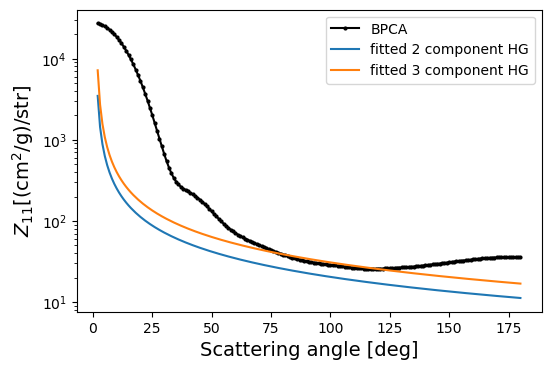

In [408]:
popt2, pcov2 = curve_fit(hg2, scattering_angle_bpca[2:], z11_bpca[2:],
                      bounds=((0.5, 0.25, -1000, -1000), (1.025, 0.75, 1000, 1000)))

popt3, pcov3 = curve_fit(hg3, scattering_angle_bpca[2:], z11_bpca[2:], 
                       bounds=((0.5, 0.25, 0, -1000, -1000, -1000), (1.025, 0.75, 0.5, 1000, 1000, 1000)))

plt.figure(dpi=100)
plt.plot(scattering_angle_bpca[2:], z11_bpca[2:], '-ok', ms=2, label='BPCA')
plt.plot(scattering_angle_bpca[2:], hg2(scattering_angle_bpca[2:], *popt2), '-', label='fitted 2 component HG')
plt.plot(scattering_angle_bpca[2:], hg3(scattering_angle_bpca[2:], *popt3), '-', label='fitted 3 component HG')
plt.xlabel('Scattering angle [deg]', fontsize=14)
plt.ylabel(r'$Z_{11}$[(cm$^2$/g)/str]', fontsize=14)
plt.yscale('log')
plt.legend()

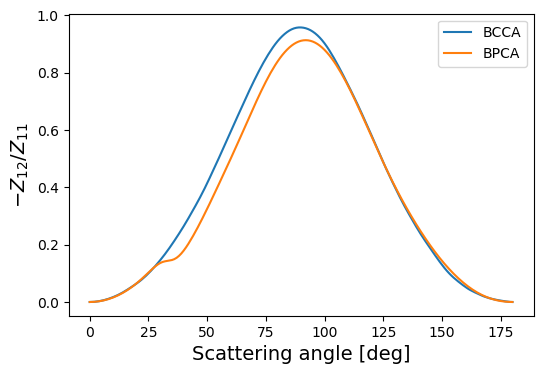

In [76]:
plt.figure(dpi=100)
plt.plot(scattering_angle_bcca, -z12_bcca/z11_bcca, '-', label='BCCA')
plt.plot(scattering_angle_bpca, -z12_bpca/z11_bpca, '-', label='BPCA')
plt.xlabel('Scattering angle [deg]', fontsize=14)
plt.ylabel(r'$-Z_{12}/Z_{11}$', fontsize=14)
plt.legend()